In [1]:
# import packages
from keras.datasets import fashion_mnist
from keras import models, layers, regularizers
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
#1. Set your random seed to 1234
random.seed(1234)

In [3]:
# 2. Load the Fashion-MNIST dataset

# Preprocess the data by converting the data to a 2D tensor with individual values between 0 and 1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Randomly split the training data into 50,000 training observations and 10,000 validation observations
train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, train_size = 50000, random_state = 1234)

4423680/4422102 [==============================] - 1s 0us/step


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
# 3. Implement a series of neural network models

#i. Initial test
network_init = models.Sequential()
network_init.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_init.add(layers.Dense(512, activation='relu'))
network_init.add(layers.Dense(512, activation='relu'))
network_init.add(layers.Dense(512, activation='relu'))
network_init.add(layers.Dense(10, activation='softmax'))

network_init.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
init_result = network_init.fit(train_x, train_y, epochs=200, batch_size=512, validation_data=(val_x, val_y), verbose =0)

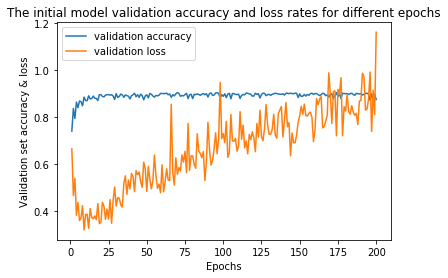

In [6]:
# Plot the validation set accuracy and loss over the epochs
init_val_acc = init_result.history['val_acc']
init_val_loss = init_result.history['val_loss']
epochs = np.arange(1, 201)

plt.plot(epochs, init_val_acc, label='validation accuracy')
plt.plot(epochs, init_val_loss, label='validation loss')
plt.ylabel('Validation set accuracy & loss')
plt.xlabel('Epochs')
plt.title('The initial model validation accuracy and loss rates for different epochs')
plt.legend()
plt.show()